# **CONTENT**
1. Loading Packages.
2. API connection to spotify.
3. Data transformation from Json to dataset. (Content of artists, songs and genre).
4. Creation of bucket in GCP.
5. Import csv into Big-Query.
6. Selecting data of created datasets.
7. Automation.

# **Installing Packages**


In [318]:
import requests
url = "https://github.com/Joshep1229/spotify_project/blob/main/json/composite-shard-382500-ebe5038e2615.json"
response = requests.get(url)
if response.status_code == 200:
    data =  response.content
else:
    print("Failed to retrieve JSON data")

In [319]:
# Installing Packages
!pip install spotify  -q
!pip install spotipy  -q
!pip install gdown    -q
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import spotify
import spotipy
from datetime import date
import os
import spotify
import spotipy
from datetime import date
import string as str


# EXTRACTION. API CONNECTION TO SPOTIFY + CONVERTING JSON TO DATAFRAME
---



In [320]:
from spotipy.oauth2 import SpotifyClientCredentials

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="74d4bbd27a8e4a2fb374a14b6ca41ca7",
                                                           client_secret="80eeca8fdc0d404480c79d0a4c40eca4"))


 # Playlist TOP 50 GLOBAL

In [321]:
playlist_link = "https://open.spotify.com/playlist/37i9dQZEVXbNG2KDcFcKOF"
playlist_URI = playlist_link.split("/")[-1].split("?")[0]
track_uris = [x["track"]["uri"] for x in sp.playlist_tracks(playlist_URI)["items"]]
track_names = []
artist_uris = []
artists_info = []
artist_names = []
artist_pops = []
artists_genres = []
albums = []
track_pops= []
explicits = []
relased_dates = []
for track in sp.playlist_tracks(playlist_URI)["items"]:
    #URI
    track_uri = track["track"]["uri"]
    #Explicit name
    explicit=track["track"]['explicit']
    explicits.append(explicit)  
    #Track name
    track_name = track["track"]["name"]
    track_names.append(track_name)    
    #Main Artist
    artist_uri = track["track"]["artists"][0]["uri"]
    artist_uris.append(artist_uri)
    artist_info = sp.artist(artist_uri)
    artists_info.append(artist_info)
    #Name, popularity, genre
    artist_name = track["track"]["artists"][0]["name"]
    artist_names.append(artist_name)
    artist_pop = artist_info["popularity"]
    artist_pops.append(artist_pop)
    artist_genres = artist_info["genres"]
    artists_genres.append(artist_genres)
    #Album
    album = track["track"]["album"]["name"]
    albums.append(album)
    #Popularity of the track
    track_pop = track["track"]["popularity"]
    track_pops.append(track_pop)
  
    #Release date
    release_date = track['track']['album']['release_date']
    relased_dates.append(release_date)     
    

    explicit=[int(i) for i in explicits]
Datos_canciones=pd.DataFrame(
    sp.audio_features(track_uris),
    columns=[
        "danceability",
        "energy",
        "key",
        "loudness",
        "mode",
        "speechiness",
        "acousticness",
        "instrumentalness",
        "liveness",
        "valence",
        "tempo",
        "type",
        "id",
        "uri",
        "track_href",
        "analysis_url",
        "duration_ms",
        "time_signature",
        "explicits",
        "relased_dates",
        "playlist_URI",
        "playlist"
    ],
)
Datos_canciones["popularity"]=track_pops
Datos_canciones["Album"] =albums 
Datos_canciones["Fecha_Extraccion"] = date.today() 
Datos_canciones["track_name"]= track_names 
Datos_canciones["Artist_uris"]=artist_uris
Datos_canciones["relased_dates"]=relased_dates
Datos_canciones["explicits"]=explicits
Datos_canciones["Artist_uris"]=artist_uris
Datos_canciones['Artist_uris'] =Datos_canciones['Artist_uris'].str.replace('spotify:artist:', '')
Datos_canciones['uri'] =Datos_canciones['uri'].str.replace('spotify:track:', '')
Datos_canciones['playlist_URI']=playlist_URI
Datos_canciones['playlist']="Top 50 Global"
Datos_artista=pd.DataFrame(
    columns=[
        "artists",
        "artist_name",
        "Artist_uris",
        "Artist_Info",
        "Artist_pop"
    ],
)
Datos_artista["artists"]= artist_names
Datos_artista["artist_name"]=artist_names
Datos_artista["Artist_uris"]=artist_uris
Datos_artista['Artist_uris'] = Datos_artista['Artist_uris'].str.replace('spotify:artist:', '')
#Datos_artista["Artist_Info"]= artists_info 
Datos_artista["Artist_pop"] = artist_pops
Datos_artista["Fecha_Extraccion"] = date.today() 

Datos_genero=pd.DataFrame(
    columns=[
        "Artist_uris",
        "Artist Genre"
            ],
)

Datos_genero["Artist_uris"]=artist_uris
Datos_genero['Artist_uris'] =Datos_genero['Artist_uris'].str.replace('spotify:artist:', '')

Datos_genero["Artist Genre"] = artists_genres 
Datos_genero['Main Genre']=Datos_genero['Artist Genre'].str[0]  

Datos_Modelo=pd.concat([Datos_genero, Datos_canciones, Datos_artista], axis=1)

Datos_artista=Datos_artista.drop_duplicates()
Datos_canciones=Datos_canciones.drop_duplicates()
Datos_genero=Datos_genero.drop(['Artist Genre'], axis=1)
Datos_genero=Datos_genero.drop_duplicates()
Datos_artista1=Datos_artista
Datos_canciones1=Datos_canciones
Datos_genero1=Datos_genero
Datos_Modelo1=Datos_Modelo

 # Playlist TOP 50 BRAZIL
 

In [322]:
playlist_link = "https://open.spotify.com/playlist/37i9dQZEVXbMXbN3EUUhlg"
playlist_URI = playlist_link.split("/")[-1].split("?")[0]
track_uris = [x["track"]["uri"] for x in sp.playlist_tracks(playlist_URI)["items"]]
track_names = []
artist_uris = []
artists_info = []
artist_names = []
artist_pops = []
artists_genres = []
albums = []
track_pops= []
explicits = []
relased_dates = []
for track in sp.playlist_tracks(playlist_URI)["items"]:
    #URI
    track_uri = track["track"]["uri"]
    #Explicit name
    explicit=track["track"]['explicit']
    explicits.append(explicit)  
    #Track name
    track_name = track["track"]["name"]
    track_names.append(track_name)    
    #Main Artist
    artist_uri = track["track"]["artists"][0]["uri"]
    artist_uris.append(artist_uri)
    artist_info = sp.artist(artist_uri)
    artists_info.append(artist_info)
    #Name, popularity, genre
    artist_name = track["track"]["artists"][0]["name"]
    artist_names.append(artist_name)
    artist_pop = artist_info["popularity"]
    artist_pops.append(artist_pop)
    artist_genres = artist_info["genres"]
    artists_genres.append(artist_genres)
    #Album
    album = track["track"]["album"]["name"]
    albums.append(album)
    #Popularity of the track
    track_pop = track["track"]["popularity"]
    track_pops.append(track_pop)
  
    #Release date
    release_date = track['track']['album']['release_date']
    relased_dates.append(release_date)     
    

    explicit=[int(i) for i in explicits]
Datos_canciones=pd.DataFrame(
    sp.audio_features(track_uris),
    columns=[
        "danceability",
        "energy",
        "key",
        "loudness",
        "mode",
        "speechiness",
        "acousticness",
        "instrumentalness",
        "liveness",
        "valence",
        "tempo",
        "type",
        "id",
        "uri",
        "track_href",
        "analysis_url",
        "duration_ms",
        "time_signature",
        "explicits",
        "relased_dates",
        "playlist_URI",
        "playlist"
    ],
)
Datos_canciones["popularity"]=track_pops
Datos_canciones["Album"] =albums 
Datos_canciones["Fecha_Extraccion"] = date.today() 
Datos_canciones["track_name"]= track_names 
Datos_canciones["Artist_uris"]=artist_uris
Datos_canciones["relased_dates"]=relased_dates
Datos_canciones["explicits"]=explicits
Datos_canciones["Artist_uris"]=artist_uris
Datos_canciones['Artist_uris'] =Datos_canciones['Artist_uris'].str.replace('spotify:artist:', '')
Datos_canciones['uri'] =Datos_canciones['uri'].str.replace('spotify:track:', '')
Datos_canciones['playlist_URI']=playlist_URI
Datos_canciones["playlist"]= "Top 50 Brazil"
Datos_artista=pd.DataFrame(
    columns=[
        "artists",
        "artist_name",
        "Artist_uris",
        "Artist_Info",
        "Artist_pop"
    ],
)
Datos_artista["artists"]= artist_names
Datos_artista["artist_name"]=artist_names
Datos_artista["Artist_uris"]=artist_uris
Datos_artista['Artist_uris'] = Datos_artista['Artist_uris'].str.replace('spotify:artist:', '')
#Datos_artista["Artist_Info"]= artists_info 
Datos_artista["Artist_pop"] = artist_pops
Datos_artista["Fecha_Extraccion"] = date.today() 

Datos_genero=pd.DataFrame(
    columns=[
        "Artist_uris",
        "Artist Genre"
            ],
)

Datos_genero["Artist_uris"]=artist_uris
Datos_genero['Artist_uris'] =Datos_genero['Artist_uris'].str.replace('spotify:artist:', '')

Datos_genero["Artist Genre"] = artists_genres 
Datos_genero['Main Genre']=Datos_genero['Artist Genre'].str[0]  

Datos_Modelo=pd.concat([Datos_genero, Datos_canciones, Datos_artista], axis=1)

Datos_artista=Datos_artista.drop_duplicates()
Datos_canciones=Datos_canciones.drop_duplicates()
Datos_genero=Datos_genero.drop(['Artist Genre'], axis=1)
Datos_genero=Datos_genero.drop_duplicates()
Datos_artista1=pd.concat([Datos_artista,Datos_artista1],axis=0)
Datos_canciones1=pd.concat([Datos_canciones,Datos_canciones1],axis=0)
Datos_genero1=pd.concat([Datos_genero,Datos_genero1],axis=0)
Datos_Modelo1=pd.concat([Datos_Modelo,Datos_Modelo1],axis=0)

# PLAYLIST TOP 50 Corea del sur

In [323]:
playlist_link = "https://open.spotify.com/playlist/37i9dQZEVXbNxXF4SkHj9F"
playlist_URI = playlist_link.split("/")[-1].split("?")[0]
track_uris = [x["track"]["uri"] for x in sp.playlist_tracks(playlist_URI)["items"]]
track_names = []
artist_uris = []
artists_info = []
artist_names = []
artist_pops = []
artists_genres = []
albums = []
track_pops= []
explicits = []
relased_dates = []
for track in sp.playlist_tracks(playlist_URI)["items"]:
    #URI
    track_uri = track["track"]["uri"]
    #Explicit name
    explicit=track["track"]['explicit']
    explicits.append(explicit)  
    #Track name
    track_name = track["track"]["name"]
    track_names.append(track_name)    
    #Main Artist
    artist_uri = track["track"]["artists"][0]["uri"]
    artist_uris.append(artist_uri)
    artist_info = sp.artist(artist_uri)
    artists_info.append(artist_info)
    #Name, popularity, genre
    artist_name = track["track"]["artists"][0]["name"]
    artist_names.append(artist_name)
    artist_pop = artist_info["popularity"]
    artist_pops.append(artist_pop)
    artist_genres = artist_info["genres"]
    artists_genres.append(artist_genres)
    #Album
    album = track["track"]["album"]["name"]
    albums.append(album)
    #Popularity of the track
    track_pop = track["track"]["popularity"]
    track_pops.append(track_pop)
  
    #Release date
    release_date = track['track']['album']['release_date']
    relased_dates.append(release_date)     
    

    explicit=[int(i) for i in explicits]
Datos_canciones=pd.DataFrame(
    sp.audio_features(track_uris),
    columns=[
        "danceability",
        "energy",
        "key",
        "loudness",
        "mode",
        "speechiness",
        "acousticness",
        "instrumentalness",
        "liveness",
        "valence",
        "tempo",
        "type",
        "id",
        "uri",
        "track_href",
        "analysis_url",
        "duration_ms",
        "time_signature",
        "explicits",
        "relased_dates",
        "playlist_URI",
        "playlist"
    ],
)
Datos_canciones["popularity"]=track_pops
Datos_canciones["Album"] =albums 
Datos_canciones["Fecha_Extraccion"] = date.today() 
Datos_canciones["track_name"]= track_names 
Datos_canciones["Artist_uris"]=artist_uris
Datos_canciones["relased_dates"]=relased_dates
Datos_canciones["explicits"]=explicits
Datos_canciones["Artist_uris"]=artist_uris
Datos_canciones['Artist_uris'] =Datos_canciones['Artist_uris'].str.replace('spotify:artist:', '')
Datos_canciones['uri'] =Datos_canciones['uri'].str.replace('spotify:track:', '')
Datos_canciones['playlist_URI']=playlist_URI
Datos_canciones["playlist"]= "Top 50 Korea"
Datos_artista=pd.DataFrame(
    columns=[
        "artists",
        "artist_name",
        "Artist_uris",
        "Artist_Info",
        "Artist_pop"
    ],
)
Datos_artista["artists"]= artist_names
Datos_artista["artist_name"]=artist_names
Datos_artista["Artist_uris"]=artist_uris
Datos_artista['Artist_uris'] = Datos_artista['Artist_uris'].str.replace('spotify:artist:', '')
#Datos_artista["Artist_Info"]= artists_info 
Datos_artista["Artist_pop"] = artist_pops
Datos_artista["Fecha_Extraccion"] = date.today() 

Datos_genero=pd.DataFrame(
    columns=[
        "Artist_uris",
        "Artist Genre"
            ],
)

Datos_genero["Artist_uris"]=artist_uris
Datos_genero['Artist_uris'] =Datos_genero['Artist_uris'].str.replace('spotify:artist:', '')

Datos_genero["Artist Genre"] = artists_genres 
Datos_genero['Main Genre']=Datos_genero['Artist Genre'].str[0]  

Datos_Modelo=pd.concat([Datos_genero, Datos_canciones, Datos_artista], axis=1)

Datos_artista=Datos_artista.drop_duplicates()
Datos_canciones=Datos_canciones.drop_duplicates()
Datos_genero=Datos_genero.drop(['Artist Genre'], axis=1)
Datos_genero=Datos_genero.drop_duplicates()

In [324]:
Datos_artista1=pd.concat([Datos_artista,Datos_artista1],axis=0)
Datos_canciones1=pd.concat([Datos_canciones,Datos_canciones1],axis=0)
Datos_genero1=pd.concat([Datos_genero,Datos_genero1],axis=0)
Datos_Modelo1=pd.concat([Datos_Modelo,Datos_Modelo1],axis=0)

# **CONFIGURING FINAL DATASET FOR THE DASHBOARD AND MODEL**

Datos canciones, artistas, géneros y modelo, listos.

In [325]:
Datos_Modelo.columns

Index(['Artist_uris', 'Artist Genre', 'Main Genre', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri',
       'track_href', 'analysis_url', 'duration_ms', 'time_signature',
       'explicits', 'relased_dates', 'playlist_URI', 'playlist', 'popularity',
       'Album', 'Fecha_Extraccion', 'track_name', 'Artist_uris', 'artists',
       'artist_name', 'Artist_uris', 'Artist_Info', 'Artist_pop',
       'Fecha_Extraccion'],
      dtype='object')

In [326]:
Datos_artista=Datos_artista1.drop_duplicates()
Datos_canciones=Datos_canciones1.drop_duplicates()
Datos_genero=Datos_genero1.drop_duplicates()
Datos_Modelo =Datos_Modelo1

#Datos_genero1=Datos_genero1.drop(['Artist Genre'], axis=1)

# **RECOMMENDATION MODEL**

In [327]:
from sklearn.cluster import KMeans
import numpy as np

X=np.array(Datos_Modelo[['danceability', 'energy', 'loudness','valence']])
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)


kmeans = KMeans(n_clusters=5).fit(X_norm)
label = kmeans.fit_predict(X_norm)
centroids = kmeans.cluster_centers_
print(centroids)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[-0.96620728 -1.54066145 -1.37096911 -1.09516607]
 [ 0.77702383  0.46189375  0.60395044  0.93182744]
 [-0.40996527  0.22487238  0.14172721 -1.0320841 ]
 [-0.62818542  0.95044087  0.75805256  0.38247819]
 [ 0.81161919 -0.72604082 -0.75514973  0.24493152]]


In [328]:
from sklearn.metrics import pairwise_distances
distances=pairwise_distances(X_norm, metric='euclidean')
df_distances = pd.DataFrame(distances, index=Datos_Modelo["uri"], columns=Datos_Modelo["uri"])
## Convertimos la matriz en una tabla larga
df_unpivoted = pd.melt(df_distances.reset_index(), id_vars='uri', value_vars=df_distances.columns, var_name='uri_2', value_name='distance')
df_unpivoted = df_unpivoted[df_unpivoted['uri'] != df_unpivoted['uri_2']]
df_unpivoted = df_unpivoted.sort_values(['uri', 'distance'])
df_unpivoted=df_unpivoted.sort_values(['uri','distance'], ascending=[ True,True])
df_unpivoted['similarity'] = df_unpivoted.groupby('uri')['distance'].rank()
A_cruzar = Datos_Modelo[['uri', 'track_name', 'artists']]
A_cruzar=A_cruzar.drop_duplicates()
df_recomendations=pd.merge(df_unpivoted, A_cruzar, on='uri', how='inner')
df_recomendations=pd.merge(df_recomendations, A_cruzar, left_on='uri_2',right_on = 'uri' , how='left').sort_values(['uri_x','distance'], ascending=[ True,True])

In [329]:
canciones_distancia=pd.DataFrame(X_norm)

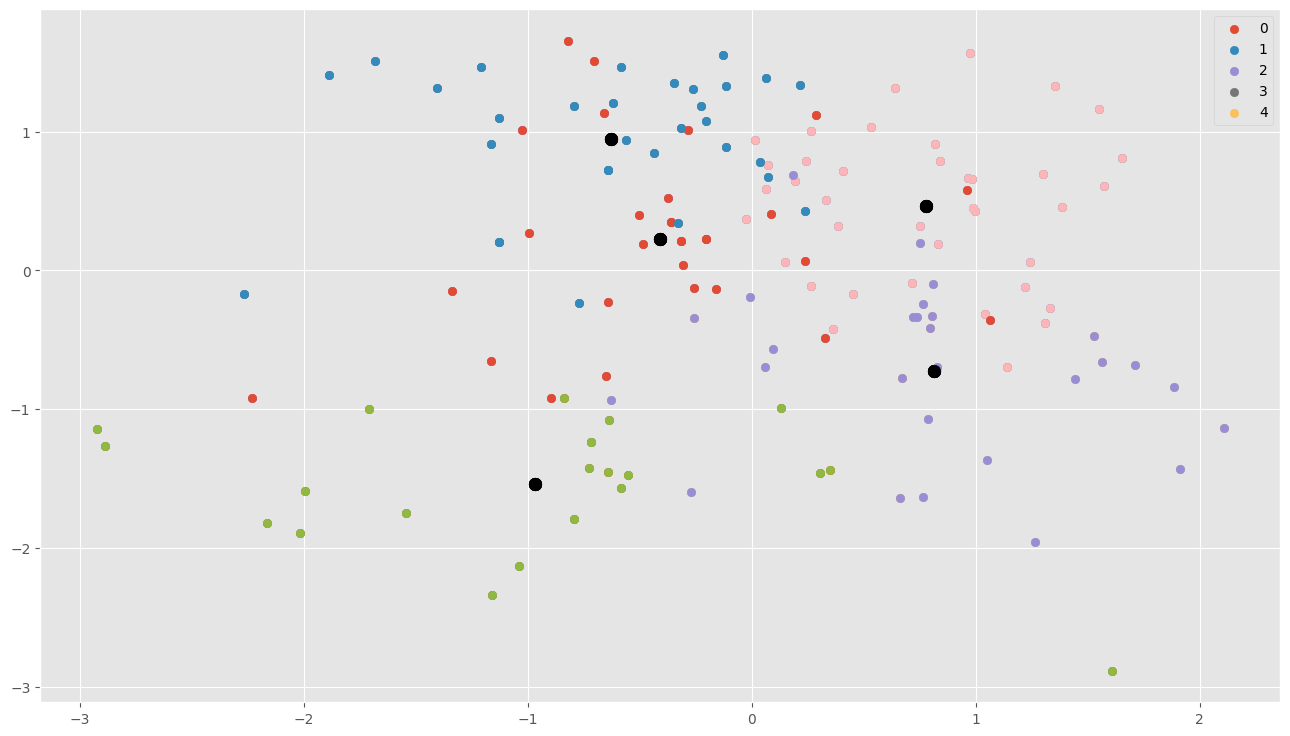

In [330]:
u_labels = np.unique(label)
#plotting the results:
for i in u_labels:
    plt.scatter(X_norm[label == i , 0] , X_norm[label == i , 1] , label = i)

#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
plt.legend()
 
 #plotting the results:
 
for i in u_labels:
    plt.scatter(X_norm[label == i , 0] , X_norm[label == i , 1] , label = i)
    plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.show()

# **TRANSFORMING THE DATASET. PREPARING TABLES.**
---

In [331]:
Datos_artista.to_csv("Datos_artista.csv", index=False)
Datos_canciones.to_csv("Datos_canciones.csv", index=False)
Datos_genero.to_csv("Datos_genero.csv", index = False)
Datos_Modelo.to_csv("Datos_modelo.csv", index = False)
df_recomendations.to_csv("df_recomendations.csv", index = False)
canciones_distancia.to_csv("canciones_distancia.csv", index = False)

# **IMPORTING TEXT INTO BUCKET GCP**

In [332]:
from google.cloud import storage
import pandas as pd
import json
import requests
!wget -O composite-shard-382500-ebe5038e2615.json https://raw.githubusercontent.com/Joshep1229/spotify_project/main/json/composite-shard-382500-ebe5038e2615.json

key_path = "/content/composite-shard-382500-ebe5038e2615.json"
# Create a client
client = storage.Client.from_service_account_json(key_path)

# Set the name of the bucket to which you want to upload the file
bucket_name = "spotify11"
# Get a reference to the bucket
bucket = client.bucket(bucket_name)

# Get the bucket containing the file you want to download
bucket = client.bucket('spotify11')

# Get a blob (file) from the bucket
blob = bucket.blob('composite-shard-382500-ebe5038e2615.json')
data = blob.download_as_string()
# Save the JSON data to a local file
with open('my_credentials.json', 'wb') as f:
    f.write(data)
# Create credentials from the downloaded file
creds = storage.Client.from_service_account_json('my_credentials.json')
# Path to your service account key file
#key_path = '/content/my_credentials.json'
# Create a client
client = storage.Client.from_service_account_json(key_path)

# Set the name of the bucket to which you want to upload the file
bucket_name = "spotify11"

# Set the name of the file you want to upload to the bucket
file_name = "Datos_artista.csv"
file_name1 = "Datos_canciones.csv"
file_name2 = "Datos_genero.csv"
file_name3 = "Datos_modelo.csv"
file_name4 ="df_recomendations.csv"
file_name5 ="canciones_distancia.csv"
# Set the path of the file on your local machine
file_path = "/content/Datos_artista.csv"
file_path1= "/content/Datos_canciones.csv"
file_path2= "/content/Datos_genero.csv"
file_path3= "/content/Datos_modelo.csv"
file_path4= "/content/df_recomendations.csv"
file_path5= "/content/canciones_distancia.csv"
# Get a reference to the bucket
bucket = client.bucket(bucket_name)

# Create a blob object representing the file to be uploaded
blob = bucket.blob(file_name)
blob1 = bucket.blob(file_name1)
blob2 = bucket.blob(file_name2)
blob3 = bucket.blob(file_name3)
blob4 = bucket.blob(file_name4)
blob5 = bucket.blob(file_name5)

# Upload the file to the bucket
blob.upload_from_filename(file_path)
blob1.upload_from_filename(file_path1)
blob2.upload_from_filename(file_path2)
blob3.upload_from_filename(file_path3)
blob4.upload_from_filename(file_path4)
blob5.upload_from_filename(file_path5)


--2023-04-03 00:31:47--  https://raw.githubusercontent.com/Joshep1229/spotify_project/main/json/composite-shard-382500-ebe5038e2615.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2327 (2.3K) [text/plain]
Saving to: ‘composite-shard-382500-ebe5038e2615.json’

composite-shard-382 100%[===================>]   2.27K  --.-KB/s    in 0s      

2023-04-03 00:31:47 (4.85 MB/s) - ‘composite-shard-382500-ebe5038e2615.json’ saved [2327/2327]



# **LOAD DATASET INTO GCP BUCKET.**

Creation of Tables and Insertion of dataset.*italicized text*

Las Queries ya están creadas desde el editor de BIG Query.

Load bucket GCP into GCP Big Query



In [336]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "composite-shard-382500-ebe5038e2615.json"
from google.cloud import bigquery
client1 = bigquery.Client(project="270888618758")

# Crear tabla.
QUERY = ('LOAD DATA OVERWRITE SPOTIFY.artista FROM FILES (format = "CSV", uris = ["gs://spotify11/Datos_artista.csv"])')
query_job = client1.query(QUERY)  # API request
results=query_job.to_dataframe()
results;


QUERY = ('LOAD DATA OVERWRITE SPOTIFY.canciones1 FROM FILES (format = "CSV", uris = ["gs://spotify11/Datos_canciones.csv"])')
query_job = client1.query(QUERY)  # API request
results=query_job.to_dataframe()
results;


QUERY = ('LOAD DATA OVERWRITE SPOTIFY.genero FROM FILES (format = "CSV", uris = ["gs://spotify11/Datos_genero.csv"])')
query_job = client1.query(QUERY)  # API request
results=query_job.to_dataframe()
results;

QUERY = ('LOAD DATA OVERWRITE SPOTIFY.modelo FROM FILES (format = "CSV", uris = ["gs://spotify11/Datos_modelo.csv"])')
query_job = client1.query(QUERY)  # API request
results=query_job.to_dataframe()
results;

QUERY = ('LOAD DATA OVERWRITE SPOTIFY.recomendations FROM FILES (format = "CSV", uris = ["gs://spotify11/df_recomendations.csv"])')
query_job = client1.query(QUERY)  # API request
results=query_job.to_dataframe()
results;


QUERY = ('LOAD DATA OVERWRITE SPOTIFY.canciones_distancia FROM FILES (format = "CSV", uris = ["gs://spotify11/canciones_distancia.csv"])')
query_job = client1.query(QUERY)  # API request
results=query_job.to_dataframe()
results;

# **READING QUERIES + JOINS**



In [337]:
# Listar Query
QUERY = (
    'select * from SPOTIFY.modelo limit 30')
query_job = client1.query(QUERY)  # API request
results=query_job.to_dataframe()
results

,Artist_uris,Artist_Genre,Main_Genre,danceability,energy,key,loudness,mode,speechiness,acousticness,...,Album,Fecha_Extraccion,track_name,Artist_uris_29,artists,artist_name,Artist_uris_32,Artist_Info,Artist_pop,Fecha_Extraccion_35
0,4gkSpcyfxtm5OFoZCYWTeD,[],None,0.876,0.623,11,-6.037,1,0.1010,0.02410,...,WHERE DOES SASQUATCH LIVE? Pt. 1,2023-04-03,CHRISTIAN,4gkSpcyfxtm5OFoZCYWTeD,Zior Park,Zior Park,4gkSpcyfxtm5OFoZCYWTeD,None,48,2023-04-03
1,6UZ0ba50XreR4TM8u322gs,[],None,0.841,0.384,9,-7.684,0,0.0351,0.02360,...,ME,2023-04-03,FLOWER,6UZ0ba50XreR4TM8u322gs,JISOO,JISOO,6UZ0ba50XreR4TM8u322gs,None,65,2023-04-03
2,6UZ0ba50XreR4TM8u322gs,[],None,0.779,0.646,8,-5.884,0,0.0388,0.02600,...,ME,2023-04-03,All Eyes On Me,6UZ0ba50XreR4TM8u322gs,JISOO,JISOO,6UZ0ba50XreR4TM8u322gs,None,65,2023-04-03
3,2eK9gcJQ6uqVvJL63dnOM3,[],None,0.588,0.893,6,-2.743,1,0.0866,0.17600,...,Cintilante (Ao Vivo),2023-04-03,Erro Gostoso - Ao Vivo,2eK9gcJQ6uqVvJL63dnOM3,Simone Mendes,Simone Mendes,2eK9gcJQ6uqVvJL63dnOM3,None,69,2023-04-03
4,2CxOaVqRvTLZAZ7nFnJhsU,[],None,0.824,0.587,4,-2.264,0,0.0392,0.29500,...,Lovezinho,2023-04-03,Lovezinho,2CxOaVqRvTLZAZ7nFnJhsU,Treyce,Treyce,2CxOaVqRvTLZAZ7nFnJhsU,None,70,2023-04-03
5,0uGWkZRPp1Urk77XBrPBsZ,[],None,0.691,0.708,9,-4.821,1,0.1950,0.33800,...,Nosso Quadro,2023-04-03,Nosso Quadro,0uGWkZRPp1Urk77XBrPBsZ,AgroPlay,AgroPlay,0uGWkZRPp1Urk77XBrPBsZ,None,74,2023-04-03
6,5szJHKg5xeUlQ9pTqzdpic,[],None,0.838,0.708,5,-4.668,0,0.1660,0.17600,...,Rara Vez,2023-04-03,Rara Vez,5szJHKg5xeUlQ9pTqzdpic,Taiu,Taiu,5szJHKg5xeUlQ9pTqzdpic,None,74,2023-04-03
7,4GJ6xDCF5jaUqD6avOuQT6,[],None,0.774,0.660,2,-8.200,1,0.0328,0.66200,...,The Beginning: Cupid,2023-04-03,Cupid,4GJ6xDCF5jaUqD6avOuQT6,FIFTY FIFTY,FIFTY FIFTY,4GJ6xDCF5jaUqD6avOuQT6,None,75,2023-04-03
8,4GJ6xDCF5jaUqD6avOuQT6,[],None,0.782,0.587,11,-8.300,0,0.0324,0.42800,...,The Beginning: Cupid,2023-04-03,Cupid - Twin Ver.,4GJ6xDCF5jaUqD6avOuQT6,FIFTY FIFTY,FIFTY FIFTY,4GJ6xDCF5jaUqD6avOuQT6,None,75,2023-04-03
9,4SpbR6yFEvexJuaBpgAU5p,[],None,0.882,0.797,10,-3.299,0,0.0819,0.08210,...,ANTIFRAGILE,2023-04-03,ANTIFRAGILE,4SpbR6yFEvexJuaBpgAU5p,LE SSERAFIM,LE SSERAFIM,4SpbR6yFEvexJuaBpgAU5p,None,77,2023-04-03


# AUTOMATION.

https://cloud.google.com/vertex-ai/docs/workbench/managed/schedule-managed-notebooks-run-quickstart?hl=es-419

In [335]:
#https://console.cloud.google.com/vertex-ai/workbench/managed?hl=es-419&project=plasma-yeti-380204
#https://6bf7b36e1fb668c2-dot-us-central1.notebooks.googleusercontent.com/lab/tree/2_API%2BETL_Spotify.ipynb
#https://console.cloud.google.com/vertex-ai/workbench/locations/us-west1/managed/managed-notebook-1679217573?project=plasma-yeti-380204
